#### Imports

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import model_utils
import warnings
from importlib import reload

In [3]:
plt.style.use('./styles.txt')

In [13]:
warnings.filterwarnings('ignore')

#### Index

1. [Introduction](#intro)
2. [Data Loading and Preprocessing](#dl)
3. [AdaBoost](#adaboost)
4. [Gradient Boosting](#gboost)
5. [XGBoost](#xgboost)

<a id='intro'></a>
## Introduction

Ensemble methods are machine learning techniques that combine several base models in order to produce more accurate predictions than any of the individual models could. Ensemble methods can be used for both classification and regression tasks.

There are a variety of ensemble methods, but they all share a common goal: to improve the accuracy of predictions by combining the predictions of multiple models. Consequently, ensemble methods are powerful tools. But they are not without their drawbacks. The most significant drawback is that they can be computationally expensive, since they require training multiple models. Additionally, ensemble methods can be difficult to interpret, since it can be difficult to understand how the individual models are combined.

A commonly used ensemble method is a Random Forest that creates an ensemble of decision trees from a randomly selected subset of the training data. It then aggregates the predictions of each tree to get the final classification. As the trees are trained in parallel, Random Forests require that individual trees have an accuracy greater than 50% in order for the random forest to be able to generate better results. Given the results of models so far, such a model would not generate any better results than we have already created.

In contrast to random forests, boosting methods learn from the mistakes made by previous models, meaning that we could potentially see results that improve on the models we have created so far. In this notebook we will therefore be looking at the following boosting methods: AdaBoost, Gradient Boosting, and XGBoost.

<a id='dl'></a>
### Data Loading and Processing

In [44]:
df = utils.LoadDf()
df.head()

,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,avg_tempmax,avg_temp,avg_humidity,...,precip_variance,precip_delta,dew_variance,dew_delta,windspeed_variance,windspeed_delta,winddir_variance,winddir_delta,pressure_variance,pressure_delta
0,1992,1,0.10,A,43.325000,-101.018500,SD,5.257143,-2.928571,81.142857,...,0.000000,0.00,5.399184,3.5,47.062041,-1.8,1889.074286,-48.6,28.913469,-4.3
1,1992,1,1.00,B,33.058333,-79.979167,SC,13.700000,9.885714,81.428571,...,55.589796,-4.40,7.196327,0.1,5.575510,2.0,15648.559592,-14.9,19.071020,2.4
2,1992,2,0.25,A,40.775000,-74.854160,NJ,6.385714,1.585714,67.185714,...,9.546510,0.00,19.731020,4.0,34.516735,-10.6,16492.948163,-254.6,75.711429,-0.9
3,1992,3,1.91,B,31.018500,-83.297300,GA,14.457143,11.828571,78.957143,...,59.321224,-9.70,9.142041,-4.1,11.228571,0.2,16679.204898,223.6,21.585306,-8.4
4,1992,3,2.00,B,30.728900,-87.238100,FL,14.428571,10.985714,79.971429,...,0.213355,-1.32,10.262857,-7.9,27.382857,6.7,19587.093469,-24.8,13.107755,-2.7


In [45]:
df = utils.BasicCategoricalPreprocessing(df)
df.head()

,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,avg_tempmax,avg_temp,avg_humidity,avg_precip,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,1992,1,0.10,A,43.325000,-101.018500,5.257143,-2.928571,81.142857,0.000000,...,1,0,0,0,0,0,0,0,0,0
1,1992,1,1.00,B,33.058333,-79.979167,13.700000,9.885714,81.428571,4.185714,...,0,0,0,0,0,0,0,0,0,0
2,1992,2,0.25,A,40.775000,-74.854160,6.385714,1.585714,67.185714,1.394286,...,0,0,0,0,0,0,0,0,0,0
3,1992,3,1.91,B,31.018500,-83.297300,14.457143,11.828571,78.957143,4.685714,...,0,0,0,0,0,0,0,0,0,0
4,1992,3,2.00,B,30.728900,-87.238100,14.428571,10.985714,79.971429,0.188571,...,0,0,0,0,0,0,0,0,0,0


<a id='adaboost'></a>
## AdaBoost

An adaptive boost model (AdaBoost) is a machine learning algorithm that is used to improve the performance of other machine learning algorithms. The algorithm does this by combining the predictions of multiple weak learners to create a strong learner. The weak learners are typically decision trees, or better decision stumps, which are trees that only have one node and two leaves. The algorithm is effective because it can reduce the bias of the strong learner and improve the accuracy of the predictions.

As we mentioned above, we can use a variety of models when using AdaBoost. To begin, we will be using decision trees, as decision trees have generally performed better in the classification models that we have created so far.

In [27]:
from sklearn.model_selection import train_test_split

X, y = model_utils.GenerateXy(df)

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

score = adaboost.score(X_test, y_test)
print(f'The accuracy of the model is {score*100:.2f}%')

The accuracy of the model is 42.19%


One of the parameters that we can change within AdaBoost is the number of estimators. We will see how increasing this number improves the ability of our model to classify the fire sizes.

In [9]:
cv_scores = []
n_est_range = list(range(1, 51))

for n_est in n_est_range:
    print(f'Fitting model: {n_est}', end="  \r")
    ada = AdaBoostClassifier(n_estimators=n_est)
    cv_scores.append(np.mean(cross_val_score(ada, X_train, y_train, cv=5)))

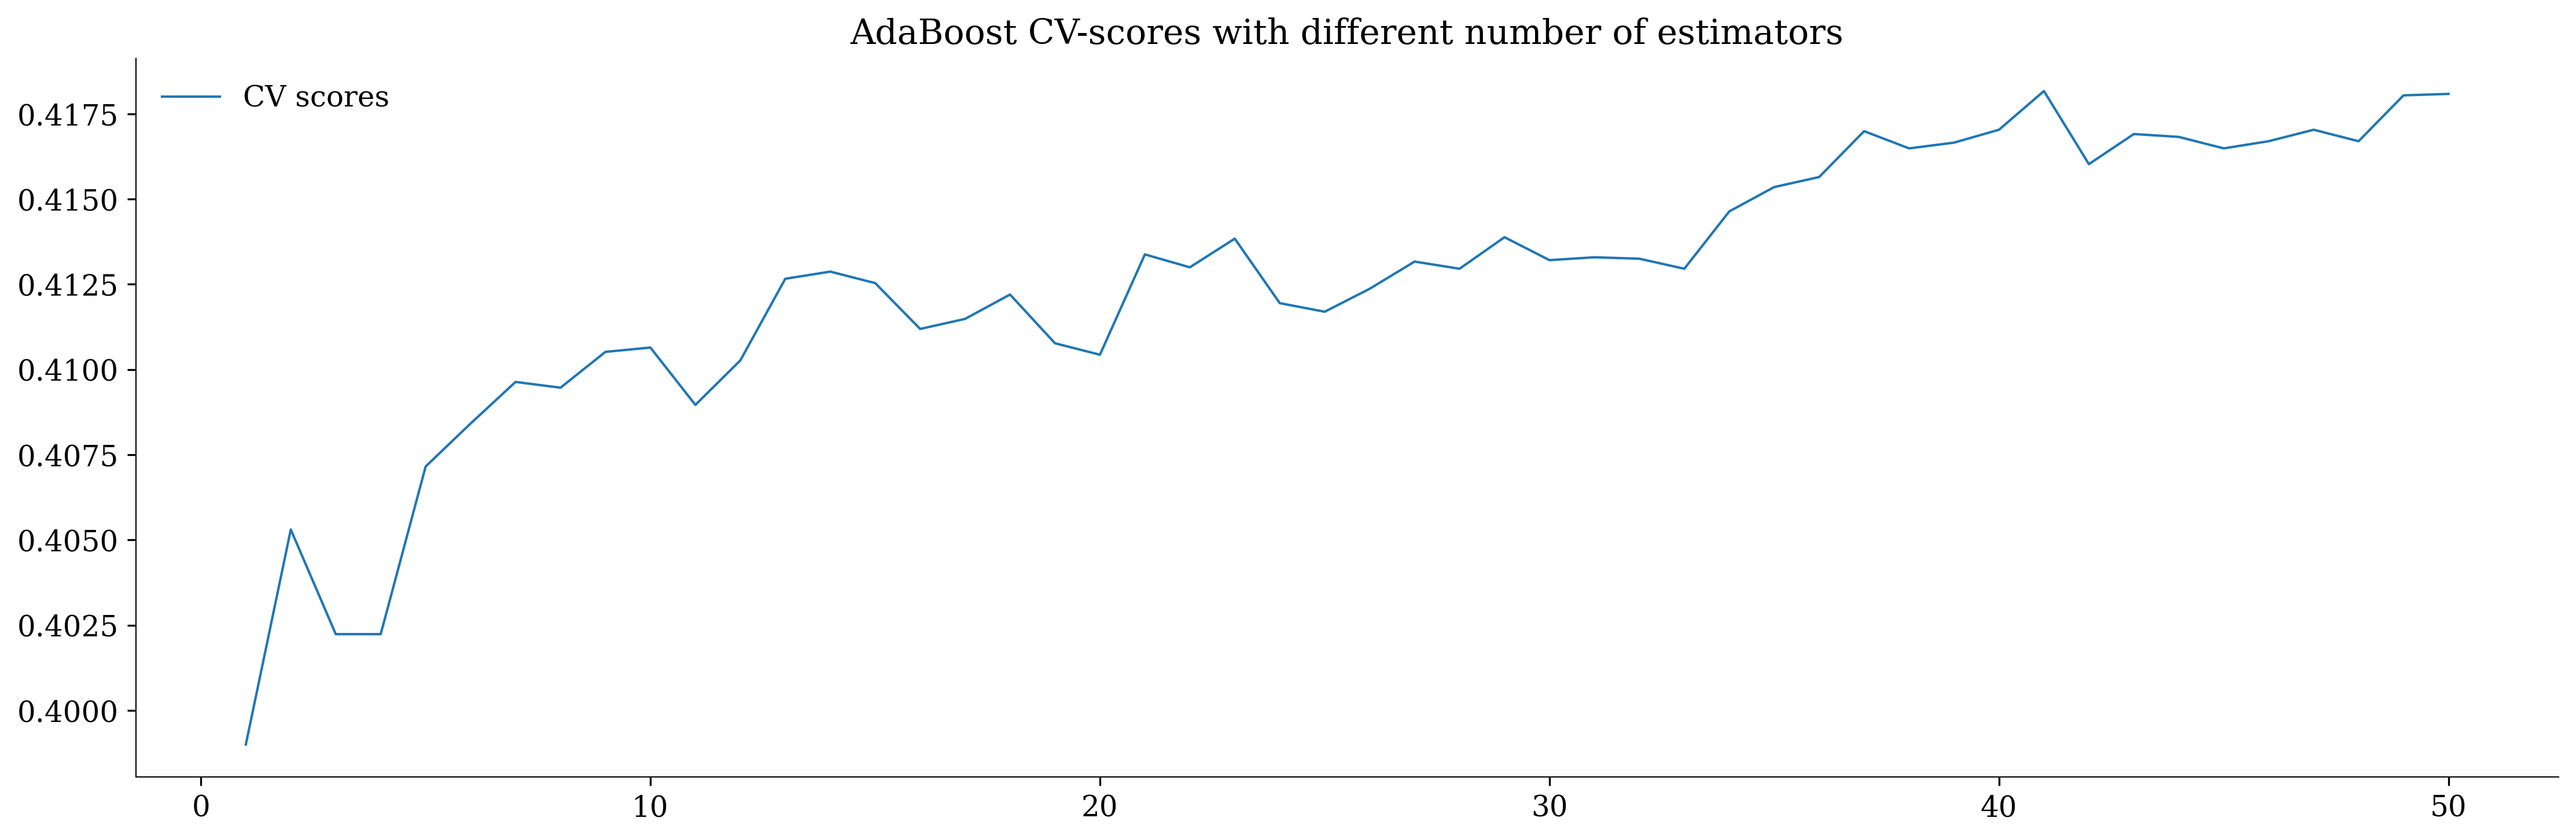

In [10]:
plt.figure(figsize=(15, 5))
plt.title("AdaBoost CV-scores with different number of estimators")
plt.plot(n_est_range, cv_scores, label="CV scores")
plt.legend()
plt.show()

Additionally, we can alter the learning rate in AdaBoost, which is the weight that is assigned to each new classifier that is added to the ensemble. The weight is proportional to the classifier's accuracy.

In [24]:
n_est_range = list(range(1, 150, 10))
learning_rate_range = [0.1, 0.5, 1.0, 1.5]

results = pd.DataFrame()

for learning_rate in learning_rate_range:
    for n_est in n_est_range:
        ada = AdaBoostClassifier(n_estimators=n_est, learning_rate=learning_rate)
        cv_score = np.mean(cross_val_score(ada, X_train, y_train, cv=5))
        
        row = pd.DataFrame(
            {
                "learning_rate": [learning_rate], 
                "n_estimators": [n_est],
                "cv_score": [cv_score]
            })
        
        results = pd.concat([results, row], axis=0, ignore_index=True)
    
        print(f'Learning rate: {learning_rate}, Estimators: {n_est}', end=" \r")

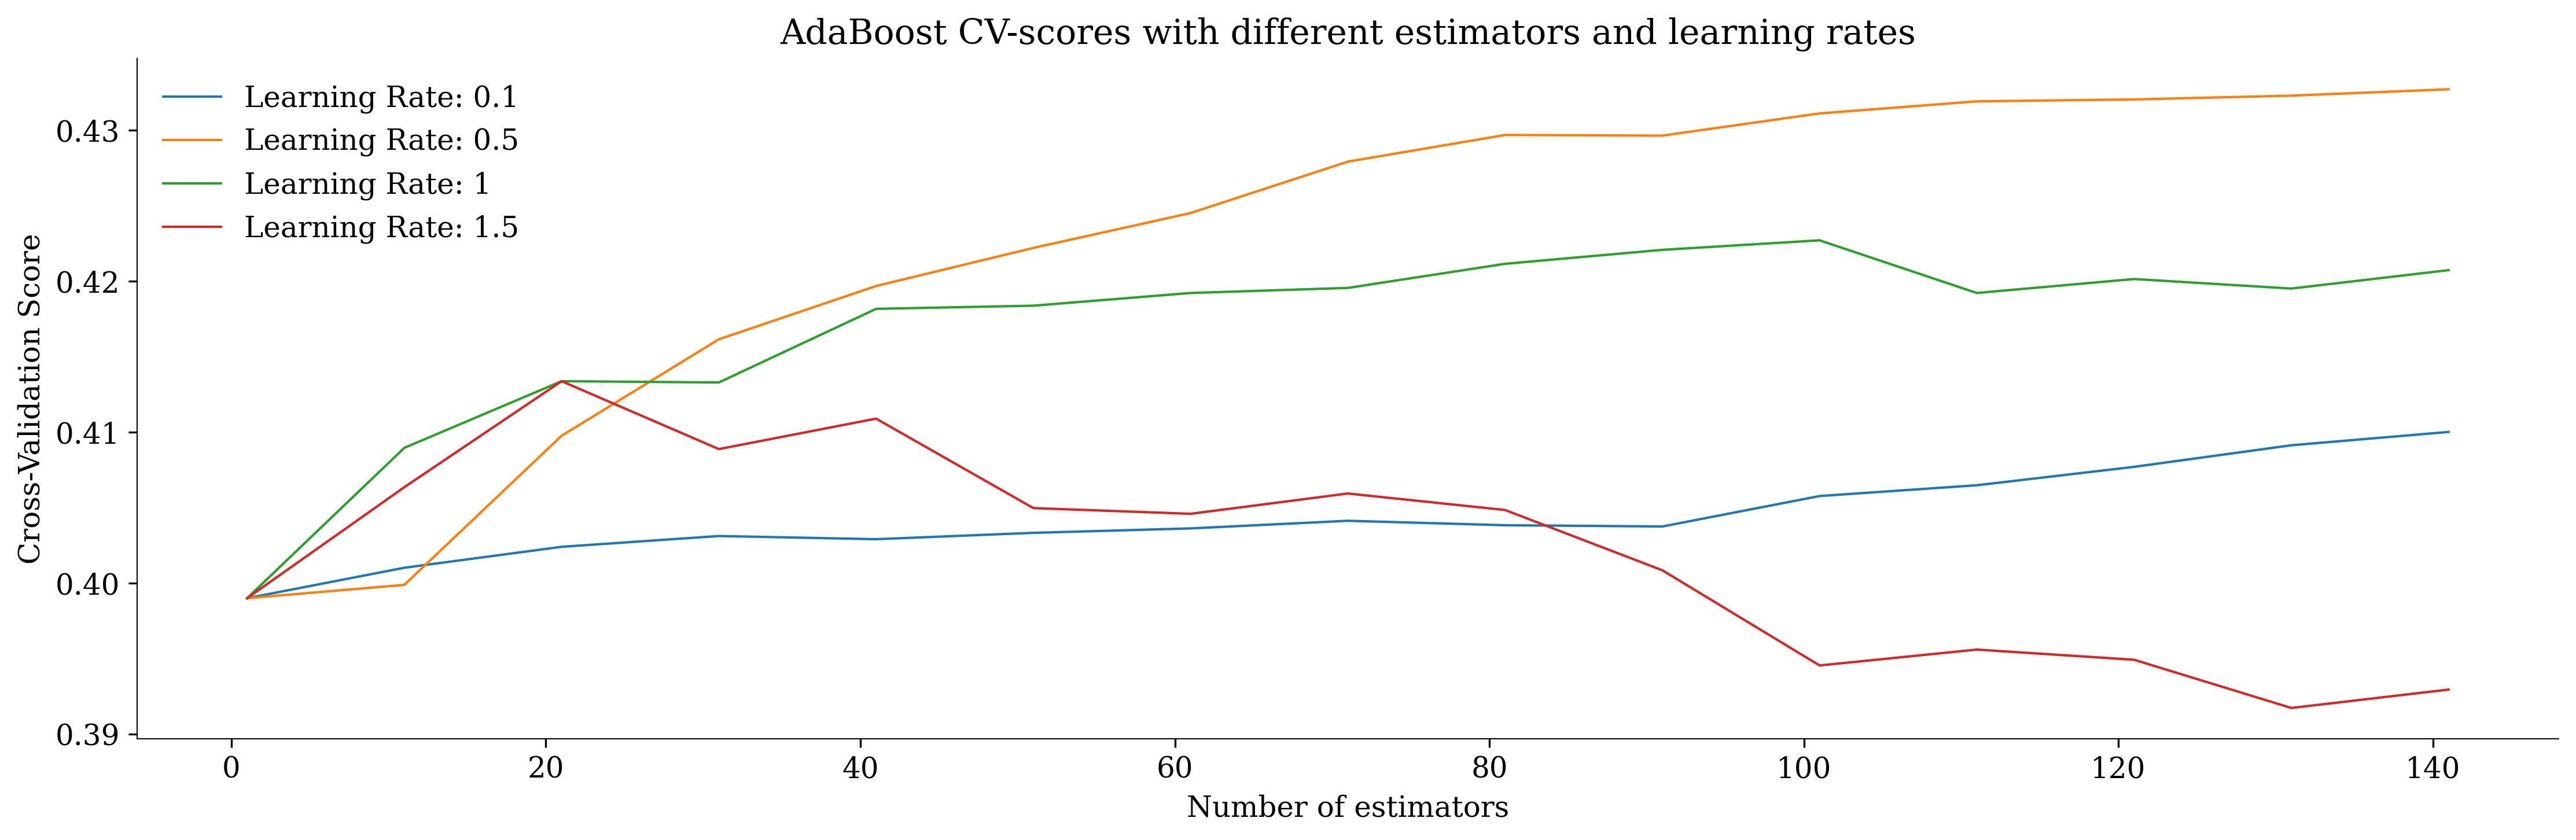

In [29]:
plt.figure(figsize=(15, 5))
plt.title('AdaBoost CV-scores with different estimators and learning rates')
for learning_rate in learning_rate_range:
    data = results[results['learning_rate'] == learning_rate]
    sns.lineplot(x='n_estimators', y='cv_score', data=data, label=f'Learning Rate: {learning_rate}')
plt.xlabel('Number of estimators')
plt.ylabel('Cross-Validation Score')
plt.legend()
plt.show()

We see that as the number of estimators increases, the cross-validation accuracy increases. This is unsuprising considering that we are combining the results of more weak learners. 

We can perhaps run a grid search, that uses a Logistic Regression as an estimator. If we use logistic regression however we will have to do some form of preprocessing on the data.

In [46]:
df, _ = utils.BasicNumericPreprocessing(df)

X, y = model_utils.GenerateXy(df)

X_rem, X_test, y_rem, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)

col_transformer = model_utils.CreateColumnTransformer(X)

In [51]:
from tempfile import mkdtemp
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

cachedir = mkdtemp()

estimators = [('normalise', col_transformer),
              ('model', AdaBoostClassifier(base_estimator=LogisticRegression()))]

pipe = Pipeline(estimators, memory=cachedir)

params = [{'model__n_estimators': n_est_range,
           'model__learning_rate': learning_rate_range}]

grid = GridSearchCV(pipe, param_grid=params, cv=5, verbose=2)
fittedgrid = grid.fit(X_rem, y_rem)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ....model__learning_rate=0.1, model__n_estimators=1; total time=   1.0s
[CV] END ....model__learning_rate=0.1, model__n_estimators=1; total time=   1.1s
[CV] END ....model__learning_rate=0.1, model__n_estimators=1; total time=   1.2s
[CV] END ....model__learning_rate=0.1, model__n_estimators=1; total time=   1.1s
[CV] END ....model__learning_rate=0.1, model__n_estimators=1; total time=   1.1s
[CV] END ...model__learning_rate=0.1, model__n_estimators=11; total time=   8.9s
[CV] END ...model__learning_rate=0.1, model__n_estimators=11; total time=   8.8s
[CV] END ...model__learning_rate=0.1, model__n_estimators=11; total time=   9.2s
[CV] END ...model__learning_rate=0.1, model__n_estimators=11; total time=   9.1s
[CV] END ...model__learning_rate=0.1, model__n_estimators=11; total time=   8.2s
[CV] END ...model__learning_rate=0.1, model__n_estimators=21; total time=  15.2s
[CV] END ...model__learning_rate=0.1, model__n_

[CV] END ...model__learning_rate=0.5, model__n_estimators=51; total time=  20.9s
[CV] END ...model__learning_rate=0.5, model__n_estimators=51; total time=  21.4s
[CV] END ...model__learning_rate=0.5, model__n_estimators=51; total time=  21.9s
[CV] END ...model__learning_rate=0.5, model__n_estimators=51; total time=  17.0s
[CV] END ...model__learning_rate=0.5, model__n_estimators=61; total time=  25.0s
[CV] END ...model__learning_rate=0.5, model__n_estimators=61; total time=  24.9s
[CV] END ...model__learning_rate=0.5, model__n_estimators=61; total time=  24.6s
[CV] END ...model__learning_rate=0.5, model__n_estimators=61; total time=  24.9s
[CV] END ...model__learning_rate=0.5, model__n_estimators=61; total time=  19.5s
[CV] END ...model__learning_rate=0.5, model__n_estimators=71; total time=  27.9s
[CV] END ...model__learning_rate=0.5, model__n_estimators=71; total time=  27.4s
[CV] END ...model__learning_rate=0.5, model__n_estimators=71; total time=  27.7s
[CV] END ...model__learning_

[CV] END ....model__learning_rate=1, model__n_estimators=101; total time=  38.1s
[CV] END ....model__learning_rate=1, model__n_estimators=101; total time=  30.2s
[CV] END ....model__learning_rate=1, model__n_estimators=111; total time=  38.6s
[CV] END ....model__learning_rate=1, model__n_estimators=111; total time=  40.0s
[CV] END ....model__learning_rate=1, model__n_estimators=111; total time=  40.4s
[CV] END ....model__learning_rate=1, model__n_estimators=111; total time=  40.5s
[CV] END ....model__learning_rate=1, model__n_estimators=111; total time=  31.7s
[CV] END ....model__learning_rate=1, model__n_estimators=121; total time=  40.8s
[CV] END ....model__learning_rate=1, model__n_estimators=121; total time=  42.6s
[CV] END ....model__learning_rate=1, model__n_estimators=121; total time=  42.0s
[CV] END ....model__learning_rate=1, model__n_estimators=121; total time=  45.5s
[CV] END ....model__learning_rate=1, model__n_estimators=121; total time=  37.6s
[CV] END ....model__learning

In [52]:
fittedgrid.best_params_

{'model__learning_rate': 1, 'model__n_estimators': 141}

In [53]:
fittedgrid.score(X_test, y_test)

0.4148310072305364

---
#### Saving the model

In [54]:
import pickle

pickle.dump(fittedgrid, open('models/adaboost_model.sav', 'wb'))

#### Loading the model

In [55]:
fittedgrid = pickle.load(open('models/adaboost_model.sav', 'rb'))

---
<a id='gboost'></a>
## Gradient Boosting

Gradient Boost is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

The individual models are combined to form a single, more accurate model. The main difference between gradient boost and other boosting methods is that instead of using a fixed set of weak models, it builds the model in a stage-wise fashion.

In each stage, a new weak model is trained to correct the errors of the previous stage. The new weak model is typically a decision tree. The final model is the weighted sum of the weak models.

The advantage of gradient boost over other boosting methods is that it can be used to optimize an arbitrary differentiable loss function. This makes it more flexible than other methods, which are usually limited to a specific loss function (such as exponential loss for AdaBoost).

In [63]:
X, y = model_utils.GenerateXy(df)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier()
GB_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [58]:
GB_model.score(X_test, y_test)

0.416344375315285

Improve the model by using the values for the decision tree that improved the outcome of the model

In [61]:
dt_model = pickle.load(open('models/dt_model.sav', 'rb'))

In [62]:
dt_model.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': 6,
 'model__min_samples_leaf': 10,
 'model__splitter': 'best',
 'reduce_dim': None}

In [65]:
GB_model = GradientBoostingClassifier(min_samples_leaf=10, max_depth=6)
GB_model.fit(X_train, y_train)

score = GB_model.score(X_test, y_test)
print(f'The score of the improved model is: {score}')

The score of the improved model is: 0.44930216916092147


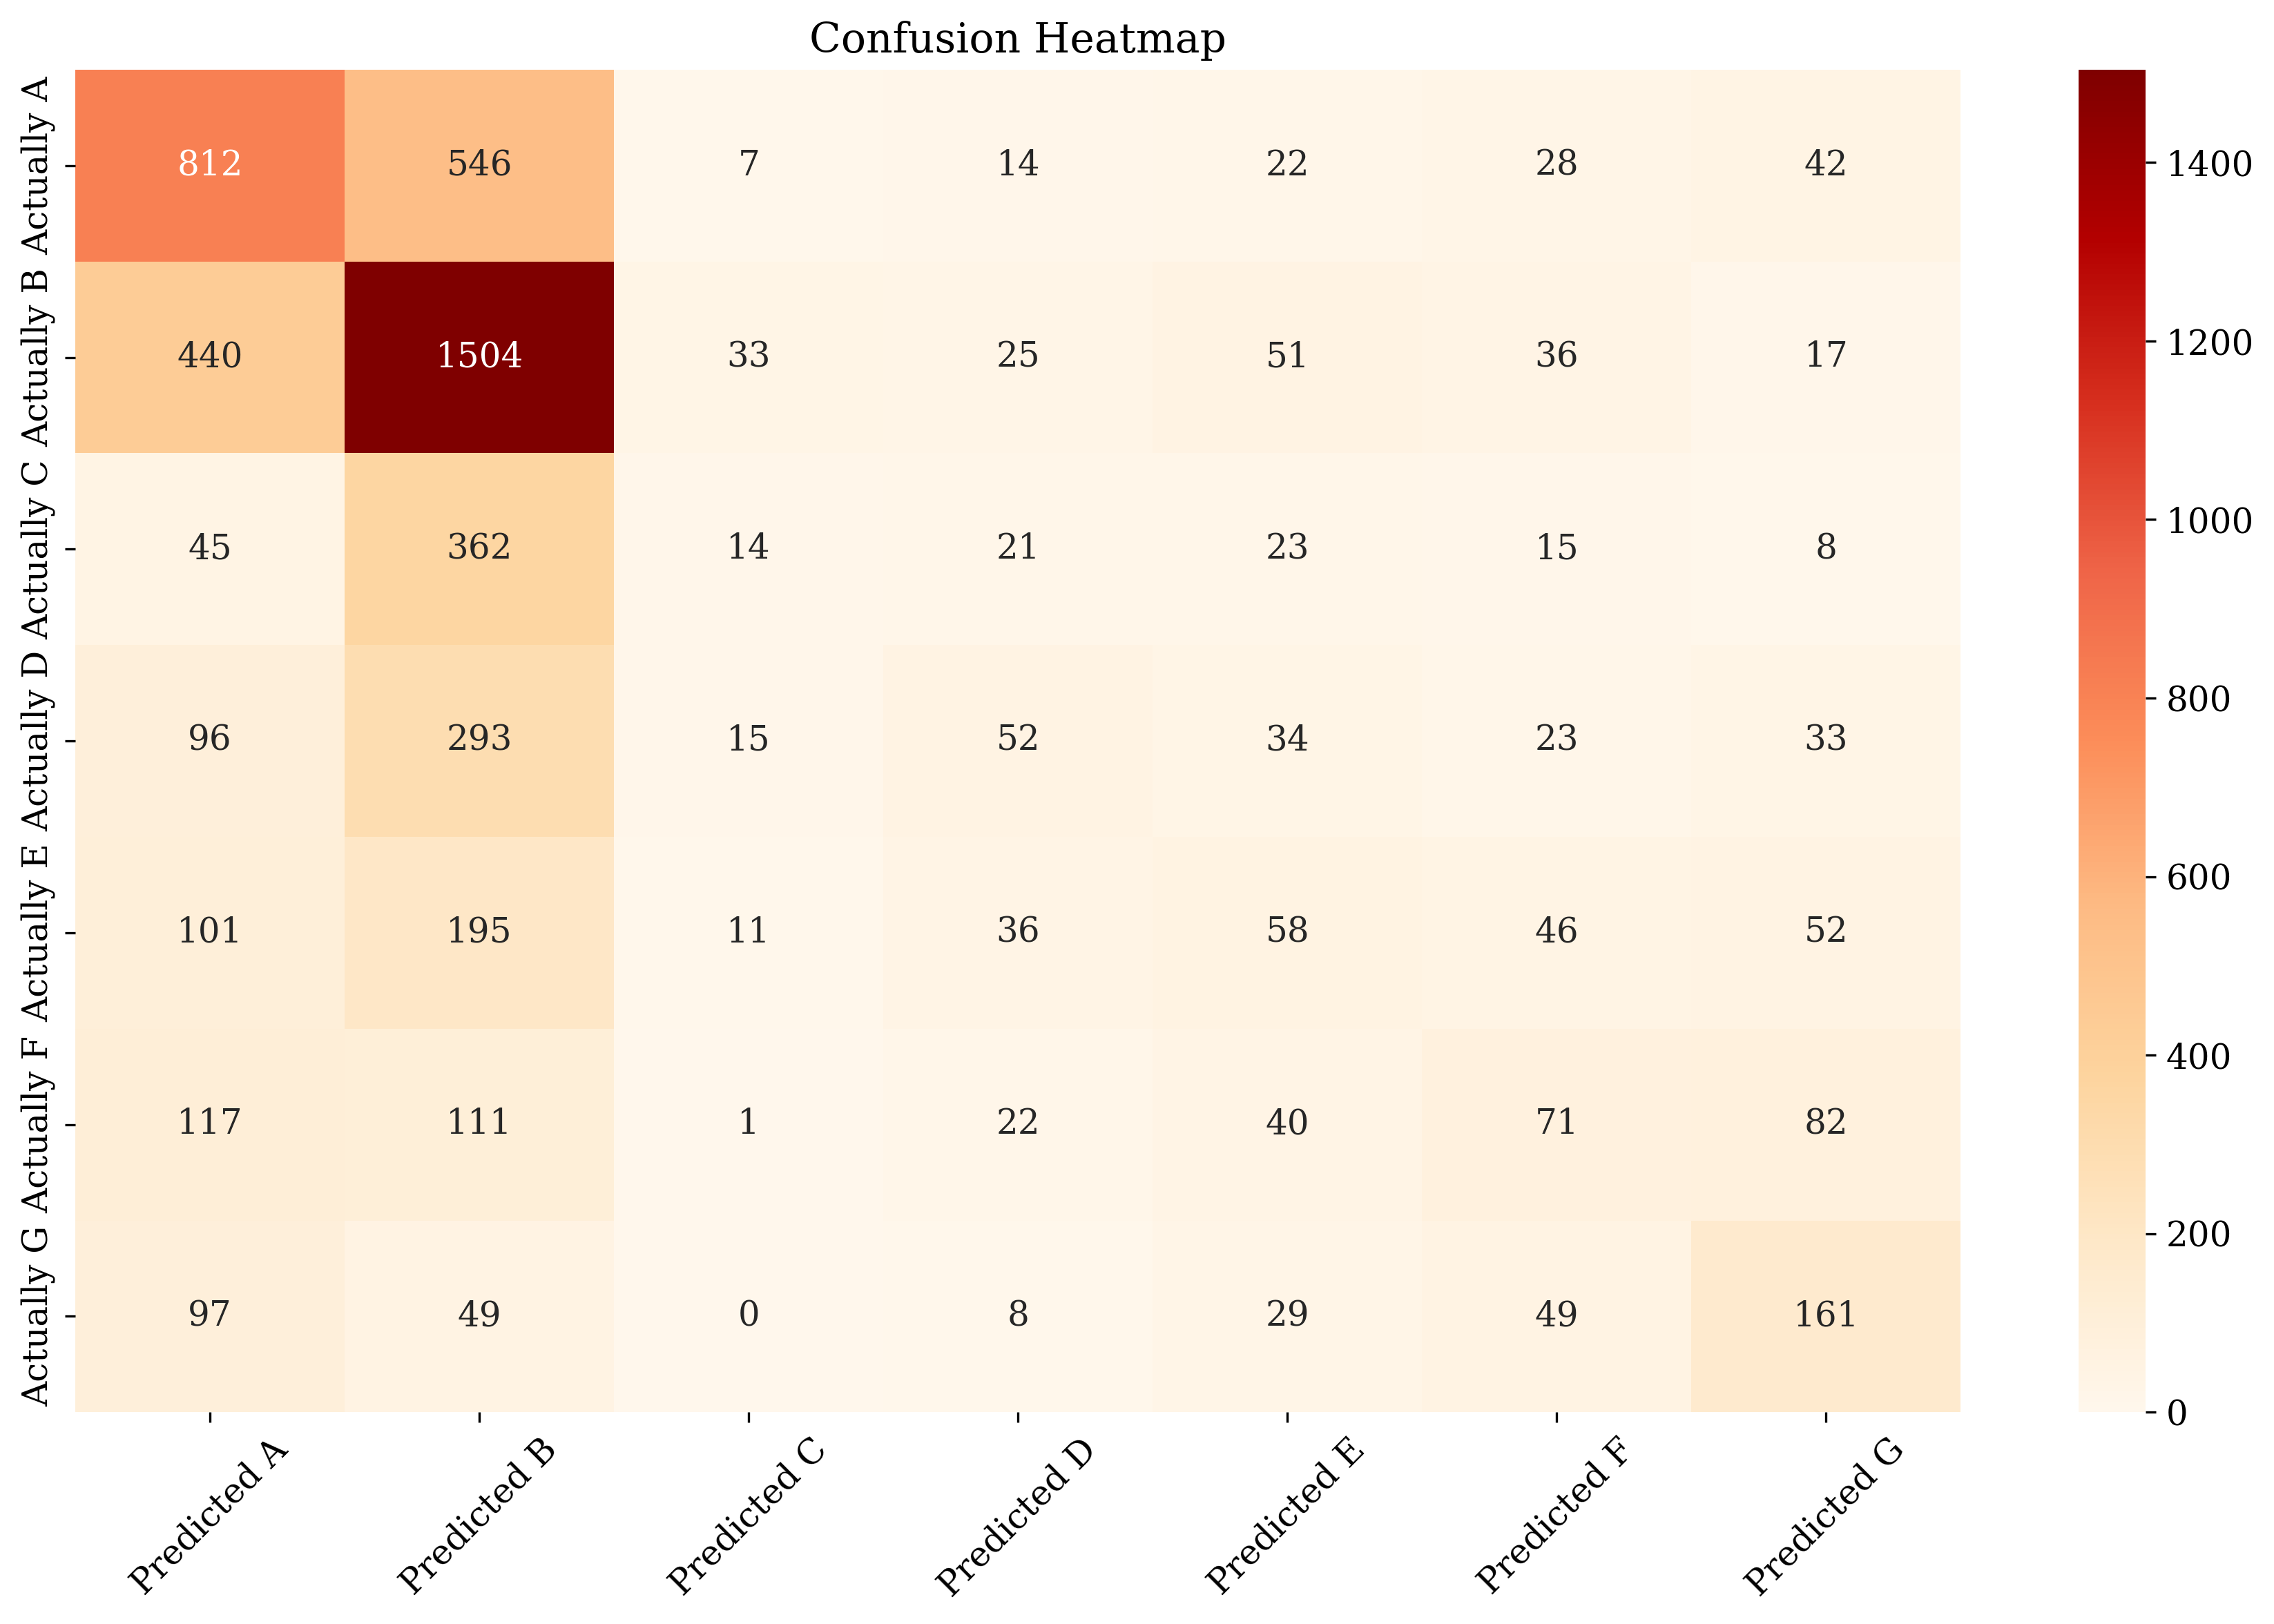

              precision    recall  f1-score   support

           A       0.48      0.55      0.51      1471
           B       0.49      0.71      0.58      2106
           C       0.17      0.03      0.05       488
           D       0.29      0.10      0.14       546
           E       0.23      0.12      0.15       499
           F       0.26      0.16      0.20       444
           G       0.41      0.41      0.41       393

    accuracy                           0.45      5947
   macro avg       0.33      0.30      0.29      5947
weighted avg       0.40      0.45      0.40      5947



In [70]:
model_utils.PlotConfusionMatrix(GB_model, X_test, y_test)

In [67]:
from sklearn.model_selection import cross_val_score

score = np.mean(cross_val_score(GB_model, X_train, y_train, cv=5, verbose=2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time= 2.5min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min remaining:    0.0s


[CV] END .................................................... total time= 2.5min
[CV] END .................................................... total time= 2.5min
[CV] END .................................................... total time= 2.5min
[CV] END .................................................... total time= 2.5min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 12.5min finished


In [68]:
print(f'The cross-validated score of the Gradient Boosting model is: {score}')

The cross-validated score of the Gradient Boosting model is: 0.4569296741343457


Although only a minor improvement we do see that the score of the model has increased using Gradient Boosting. 

<a id='xgboost'></a>
## XGBoost

XGBoost is a powerful and far-reaching machine learning system that is often used to win machine learning competitions. It is also a popular tool for making predictions in many different areas, such as credit scoring, staff retention, and demand forecasting.

XGBoost models are trained using a gradient boosting technique. This is a general approach that can be used for a wide variety of predictive modeling tasks. The key idea is to train a series of simple models, each of which makes predictions that are slightly better than random guessing. The predictions from all of the models are then combined to create a final prediction that is much better than what any of the individual models could produce.

XGBoost models are particularly effective when there is a large amount of training data available. They are also relatively resistant to overfitting, which can be a problem with other machine learning methods.

XGBoost models are not the simplest machine learning models to understand or interpret. However, they can often provide very accurate predictions.

To begin we will create a simple XGBoost classifier.

In [75]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(objective='multi:softmax', num_class=7, eval_metric='mlogloss')
xgboost.fit(X_train, y_train)

print(f'XGBoost score: {xgboost.score(X_test, y_test)}')

XGBoost score: 0.462922481923659


We have been able to increase the accuracy of the model, albeit marginally.

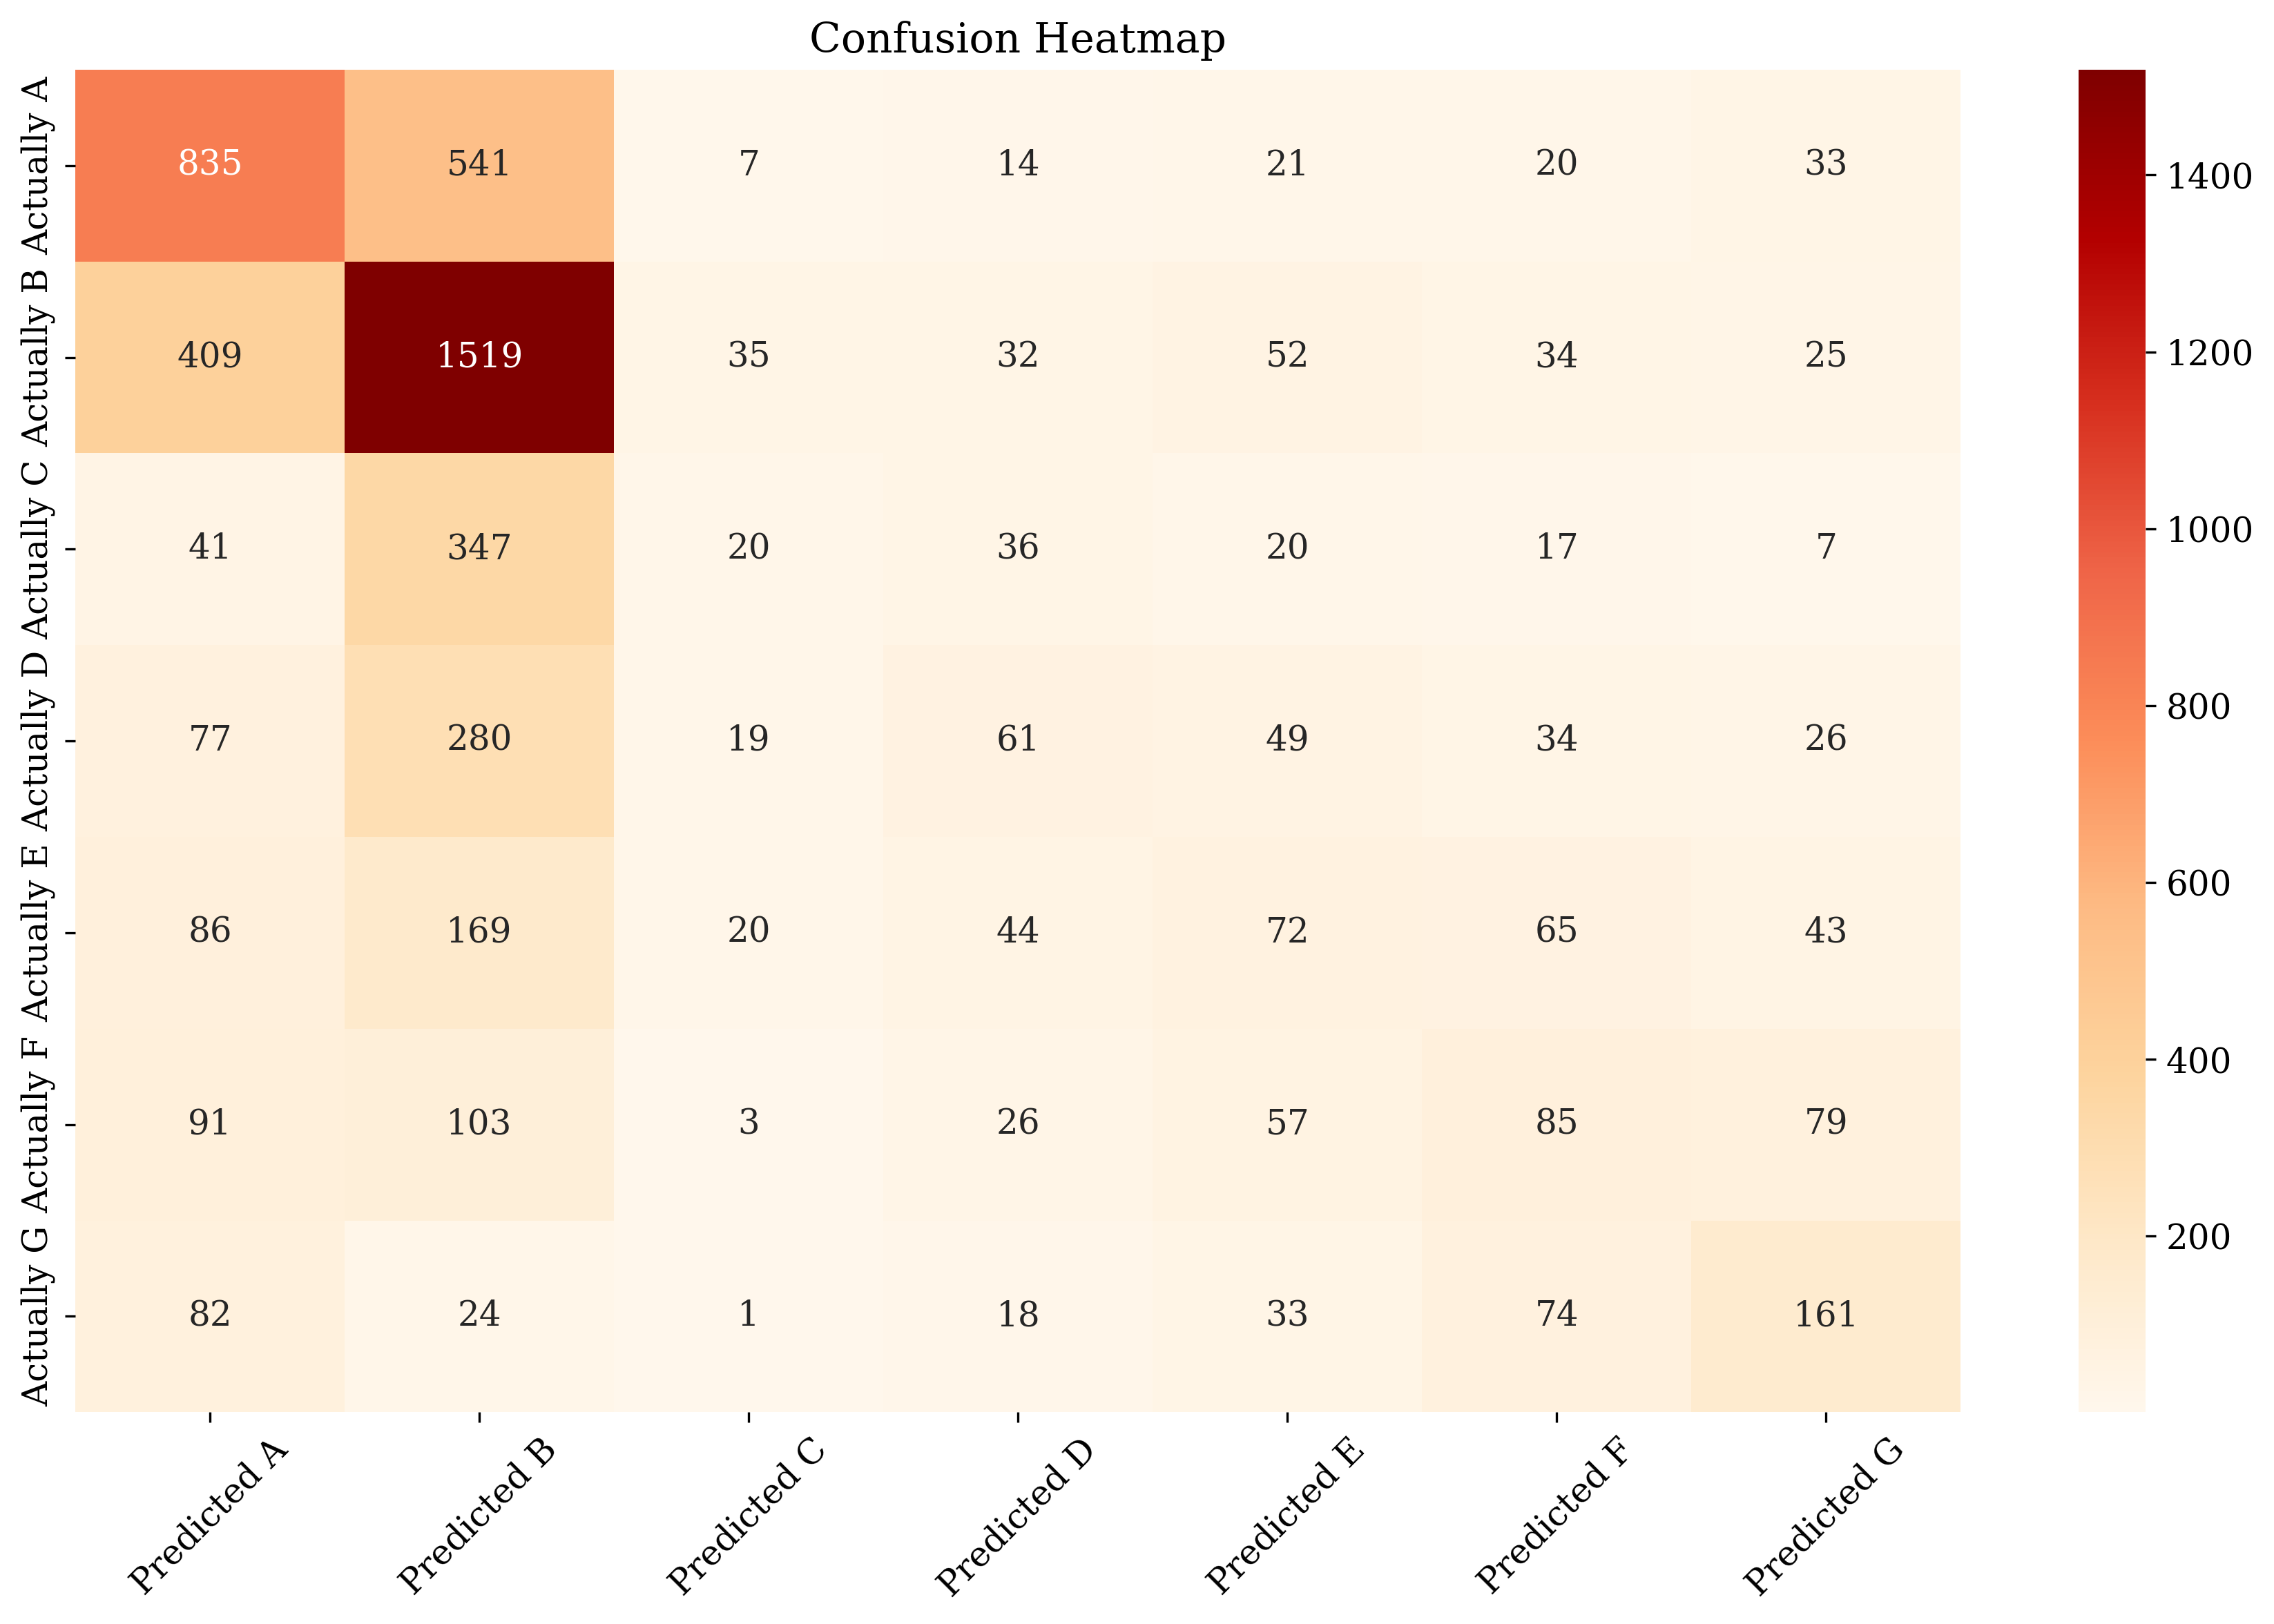

              precision    recall  f1-score   support

           A       0.52      0.57      0.54      1471
           B       0.51      0.72      0.60      2106
           C       0.19      0.04      0.07       488
           D       0.26      0.11      0.16       546
           E       0.24      0.14      0.18       499
           F       0.26      0.19      0.22       444
           G       0.43      0.41      0.42       393

    accuracy                           0.46      5947
   macro avg       0.34      0.31      0.31      5947
weighted avg       0.42      0.46      0.42      5947



In [76]:
model_utils.PlotConfusionMatrix(xgboost, X_test, y_test)

The accuracy of the model was not the only metric that increased. Most of the precision and recall values were increased and only class D precision fell from 0.29 to 0.26.

So far in our modelling process, we have seen that extremely large fires can be well classified.

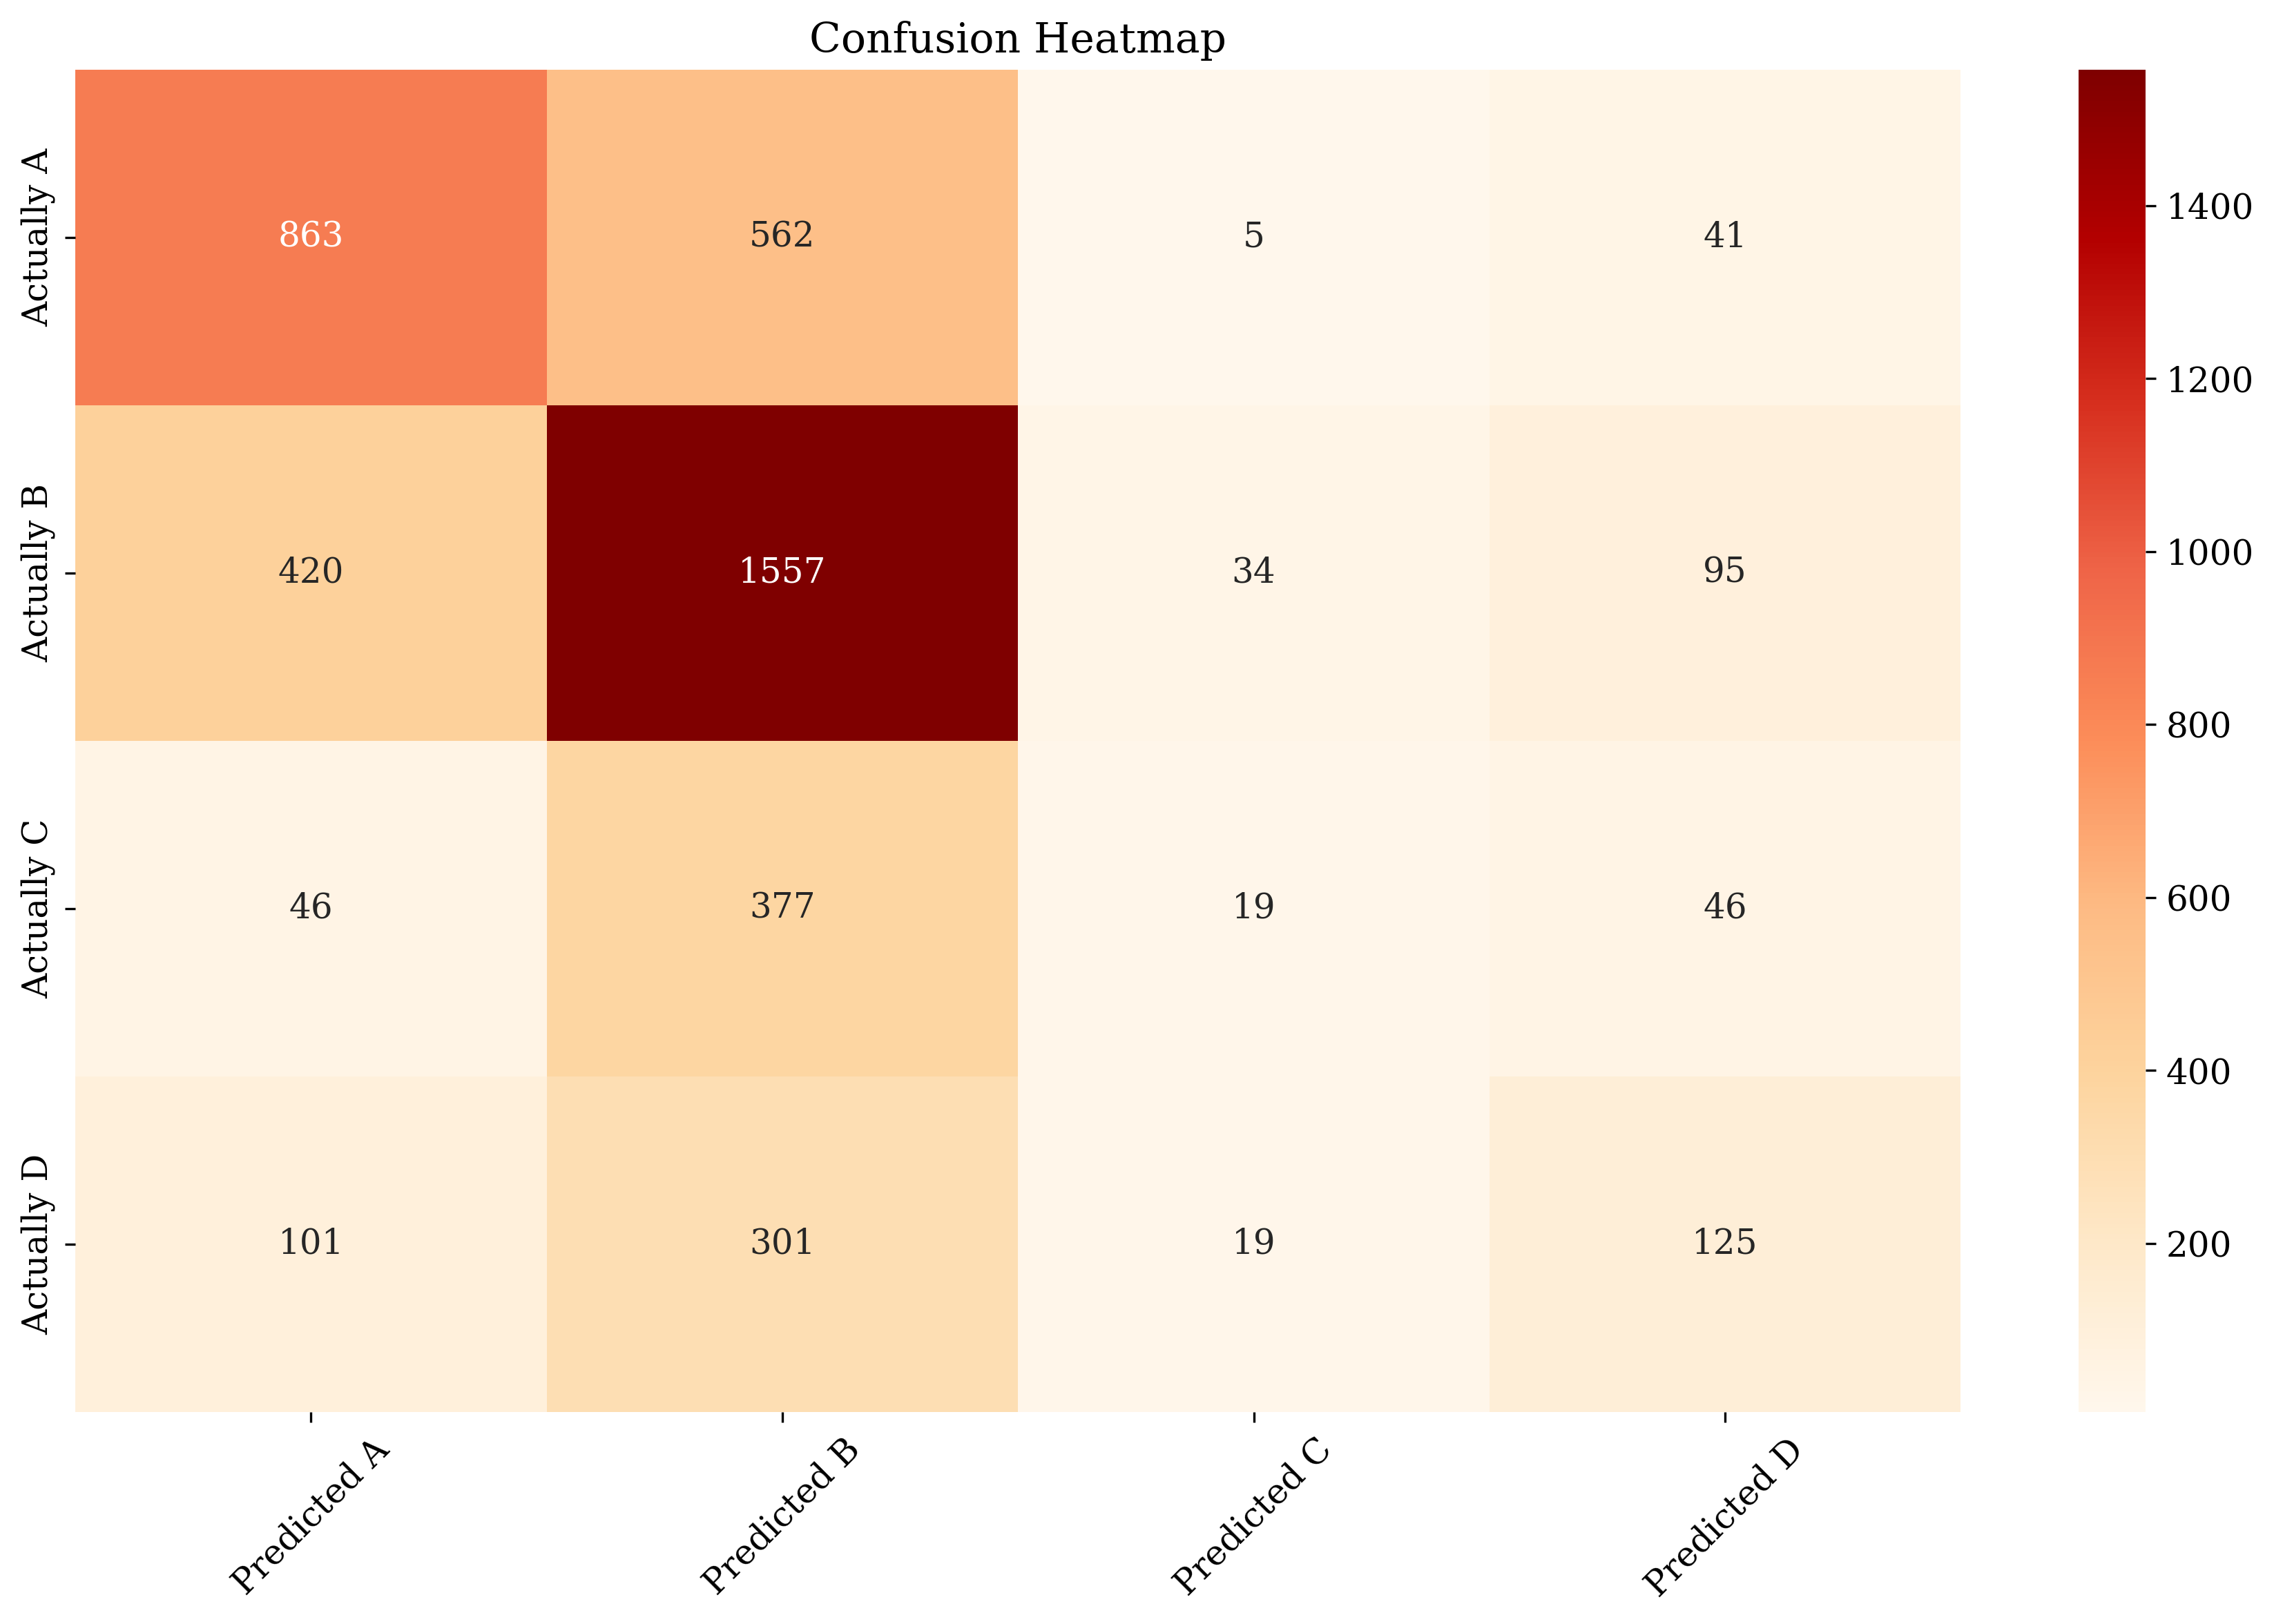

              precision    recall  f1-score   support

           A       0.60      0.59      0.59      1471
           B       0.56      0.74      0.64      2106
           C       0.25      0.04      0.07       488
           D       0.41      0.23      0.29       546

    accuracy                           0.56      4611
   macro avg       0.45      0.40      0.40      4611
weighted avg       0.52      0.56      0.52      4611



In [79]:
classes = ['A', 'B', 'C', 'D']
df_small= df[df['FIRE_SIZE_CLASS'].isin(classes)]

X_small, y_small = model_utils.GenerateXy(df_small)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_small, 
                                                            y_small, 
                                                            stratify=y_small, 
                                                            test_size=0.2, 
                                                            random_state=1)

xgboost_small = XGBClassifier(objective='multi:softmax', num_class=4, eval_metric='mlogloss')
xgboost_small.fit(X_train_s, y_train_s)

model_utils.PlotConfusionMatrix(xgboost_small, X_test_s, y_test_s)

## Using SMOTE

In [82]:
from imblearn.over_sampling import SMOTE

# instantiate SMOTE sampler, fit it to the training data, then resample the data
X_train_sm, y_train_sm = SMOTE(random_state=1).fit_resample(X_train, y_train)

In [89]:
from sklearn.tree import DecisionTreeClassifier

# Fit model to all and see which performs best
adaboost_sm = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=10, max_depth=6))
gradient_boost_sm = GradientBoostingClassifier(min_samples_leaf=10, max_depth=6)
xgboost_sm = XGBClassifier(objective='multi:softmax', num_class=7, eval_metric='mlogloss')

adaboost_sm.fit(X_train_sm, y_train_sm)
gradient_boost_sm.fit(X_train_sm, y_train_sm)
xgboost_sm.fit(X_train_sm, y_train_sm);

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_class=7, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, ...)

In [90]:
print('AdaBoost Test Score: ', adaboost_sm.score(X_test, y_test))
print('Gradient Boost Test Score: ', gradient_boost_sm.score(X_test, y_test))
print('XGBoost Test Score: ', xgboost_sm.score(X_test, y_test))

AdaBoost Test Score:  0.27560114343366404
Gradient Boost Test Score:  0.4178577434000336
XGBoost Test Score:  0.4336640322851858


We see then that using SMOTE did not improve the outcome of our models.

In [92]:
df_sample = utils.sample_rows(df)